In [4]:
import numpy as np 
import pandas as pd
df = pd. read_csv('spam.csv', encoding='ANSI')
df. to_csv('spam.csv', encoding='utf-8', index=False)

ParserError: Error tokenizing data. C error: out of memory

In [ ]:
df.head()

In [3]:
df.shape

(5572, 5)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#1. Data Cleaning 
#2. EDA 
#3. Text Preprocessing 
#4. Model Building 
#5. evaluation
#6. improvements 
#7. creating website 
#8 . deploy to heroku 

# Data Cleaning 

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
2654,ham,Its sarcasm.. .nt scarcasim
5529,ham,What about this one then.
2237,ham,"Give her something to drink, if she takes it a..."
2822,ham,Then u ask darren go n pick u lor... But i oso...
401,ham,Dear how is chechi. Did you talk to her


In [8]:
#renaming the columns 
df.rename(columns={'v1':'target','v2':'text'},inplace =True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# since in target columns its written either ham or spam so we apply label encoding here 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [11]:
#spam = 1 , ham =0 
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#checking missing values 
df.isnull().sum()  #no missing values present

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values 
df.duplicated().sum() #403 duplicate values 

403

In [14]:
#remove duplicates 
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()  #no duplicates present 

0

In [16]:
df.shape

(5169, 2)

# 2. EDA

In [17]:
df['target'].value_counts()  #ham is 4516 and spam is 653

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1c05abf69d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

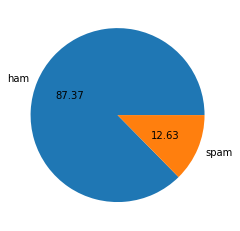

In [18]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')

In [19]:
#can see 88% data is not spam and 13% is spam 
#data is imbalanced 

In [20]:
#now we create 3 columns in which we can find number of characters , no. of words and no. of sentences in the sms 

In [21]:
import nltk 

In [22]:
#nltk.download('punkt')

In [23]:
df['num_characters']=df['text'].apply(len)  #no of characters in sms columns

In [24]:
#no. of words 
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))  #breaking sentences into words 

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#df['text'].apply(lambda x:nltk.sent_tokenize(x))  #breaks sentences in the text column

In [27]:
#number of sentences 
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5.169000e+03,5169.000000,5169.000000
mean,6.598052e+04,7451.501064,1.948152
std,2.645006e+05,29833.936454,1.363792
min,2.000000e+00,1.000000,1.000000
25%,3.700000e+01,9.000000,1.000000
50%,6.300000e+01,15.000000,1.000000
75%,1.320000e+02,29.000000,2.000000
max,4.905320e+06,553318.000000,28.000000


In [30]:
# max char - 910 , word-220 and sentences -28 used in a text column 
#on an average 79 char , 18.5 words and 1.98 sentences used in a text xolumn 
# min char - 2 , word-1 and sentences -1 used in a text column 


In [31]:
#for ham 
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4.516000e+03,4516.000000,4516.000000
mean,4.002508e+04,4523.619575,1.799601
std,2.300520e+05,25948.391783,1.278465
min,2.000000e+00,1.000000,1.000000
25%,3.400000e+01,9.000000,1.000000
50%,5.400000e+01,14.000000,1.000000
75%,1.010000e+02,24.000000,2.000000
max,4.905320e+06,553318.000000,28.000000


In [32]:
#for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,6.530000e+02,653.000000,653.000000
mean,2.454825e+05,27700.065850,2.975498
std,3.887254e+05,43844.536138,1.487993
min,1.300000e+01,2.000000,1.000000
25%,1.370000e+02,27.000000,2.000000
50%,1.560000e+02,32.000000,3.000000
75%,5.759950e+05,64978.000000,4.000000
max,2.852054e+06,321700.000000,8.000000


In [33]:
# can see that length of spam message is larger than ham messages 

In [34]:
#lets visualize through graph

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

NameError: name 'df' is not defined

<Figure size 864x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [ ]:
#lets see relationship between two columns 
sns.pairplot(df,hue='target')

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#with target highest correlation is 0.38 which is num_characters 
#since correlation between three columns(target is not included ) is very high which shows strong correlation so we cant keep all the
#columns and we will only keep num_characters as it has high correlation with target as compares to num_words or num_sentences 


# 3.Data preprocessing


In [ ]:
#lower case 
# tokenization 
# Removing special characters'
# Removing stop words and punctuation
# stemming

from nltk.stem.porter import PorterStemmer

import string  
ps=PorterStemmer()


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [ ]:
from nltk.corpus import stopwords


In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
#now we will create a word cloud 
# in this all the important words will be highlighted(make the words big ) 

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

In [ ]:
# now we have to find top 30 words used in spam or ham respectively  
#the first step is to split the word in list in transformed text column which is spam and put it in alist 
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
#now we will find occurence of each word in spam_corpus 
from collections import Counter 
Counter(spam_corpus)

In [ ]:
#if we want to find most common 30 words in the spam corpus
Counter(spam_corpus).most_common(30)

In [ ]:
#changing the above to a DataFrame
pd.DataFrame(Counter(spam_corpus).most_common(30))

In [ ]:
# now we will plot barplot between 0 and 1st columns
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#doing same for ham 
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building 


In [ ]:
#we will use naive bayes here as it is believed that naive bayes performs better on textual data 
#we will use further ensemble learning to imporove the data 

In [ ]:
df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()

In [ ]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape  #5169 sms and 6717 words 

In [ ]:
X

In [ ]:
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score  #this is a high precision model in which we want to reduce true positive
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [ ]:
print('accuracy of gaussian', accuracy_score(y_test,y_pred1))
print('Confusion matrix of gaussian',confusion_matrix(y_test,y_pred1))
print('precision score of gaussian',precision_score(y_test,y_pred1))

In [ ]:
#precision score of gaussian is very low
#precision is how good is the model in predicting specific category 

In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('accuracy of multinomial', accuracy_score(y_test,y_pred2))
print('Confusion matrix of multinomial',confusion_matrix(y_test,y_pred2))
print('precision score of multinomial',precision_score(y_test,y_pred2))

In [ ]:
#accuracy is good but precision score is still low and in this precision score is important 

In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('accuracy of bernoulli', accuracy_score(y_test,y_pred3))
print('Confusion matrix of bernoulli',confusion_matrix(y_test,y_pred3))
print('precision score of bernoulli',precision_score(y_test,y_pred3))

In [ ]:
#accuracy is good and precision is also good so bernoulli is best here 

In [ ]:
#now using tfidf vectorizer instead of count vectorizer 

In [ ]:
tfidf=TfidfVectorizer()

In [ ]:
X1=tfidf.fit_transform(df['transformed_text']).toarray()
#y will be same 

In [ ]:
X1

In [ ]:
X1.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=2)

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [ ]:
print('accuracy of gaussian', accuracy_score(y_test,y_pred1))
print('Confusion matrix of gaussian',confusion_matrix(y_test,y_pred1))
print('precision score of gaussian',precision_score(y_test,y_pred1))

In [ ]:
#precision score of gaussian is very low
#precision is how good is the model in predicting specific category 

In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('accuracy of multinomial', accuracy_score(y_test,y_pred2))
print('Confusion matrix of multinomial',confusion_matrix(y_test,y_pred2))
print('precision score of multinomial',precision_score(y_test,y_pred2))

In [ ]:
#here precision performs really better as its not giving any false positive 

In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('accuracy of bernoulli', accuracy_score(y_test,y_pred3))
print('Confusion matrix of bernoulli',confusion_matrix(y_test,y_pred3))
print('precision score of bernoulli',precision_score(y_test,y_pred3))

In [ ]:
#here we can go either with mnb or bnb but we will go with mnb as its precision is very good although accuracy is low 

In [ ]:
#we choose tfidf --> MNB

In [ ]:
#now we bring many ML models and compare it with Multinomial MNB 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb

}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy ,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores=[]
precision_scores=[]

for name,clf in  clfs.items():
    print('name',name)
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print(current_accuracy)
    print(current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
#here we consider Naive bayes as it has highest precision 
#we can too use random forest but in terms of textual data we find Naive bayes better 

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improvement

In [ ]:
#1. change max_features of tfidf vectorizer 
#tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
#X2=tfidf.fit_transform(df['transformed_text']).toarray()
#y will be same 

In [ ]:
#X2.shape

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=2)

In [ ]:
#gnb.fit(X_train,y_train)
#y_pred1=gnb.predict(X_test)

In [ ]:
#print('accuracy of gaussian', accuracy_score(y_test,y_pred1))
#print('Confusion matrix of gaussian',confusion_matrix(y_test,y_pred1))
#print('precision score of gaussian',precision_score(y_test,y_pred1))

In [ ]:
#mnb.fit(X_train,y_train)
#y_pred2=mnb.predict(X_test)
#print('accuracy of multinomial', accuracy_score(y_test,y_pred2))
#print('Confusion matrix of multinomial',confusion_matrix(y_test,y_pred2))
#print('precision score of multinomial',precision_score(y_test,y_pred2))

In [ ]:
#bnb.fit(X_train,y_train)
#y_pred3=bnb.predict(X_test)
#print('accuracy of bernoulli', accuracy_score(y_test,y_pred3))
#print('Confusion matrix of bernoulli',confusion_matrix(y_test,y_pred3))
#print('precision score of bernoulli',precision_score(y_test,y_pred3))

In [ ]:
'''svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)'''

In [ ]:
'''clfs={
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb

}'''

In [ ]:
'''def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy ,precision'''

In [ ]:
'''accuracy_scores=[]
precision_scores=[]

for name,clf in  clfs.items():
    print('name',name)
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print(current_accuracy)
    print(current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

    
print(accuracy_scores)
print(precision_scores)'''

In [ ]:
'''temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)'''

In [ ]:
''''temp_df'''

In [ ]:
#new_df=performance_df.merge(temp_df,on='Algorithm')  #merging both dataframe 

In [ ]:
#can see accuracy of naive bayes is increased in accuracy_max_ft_3000
#by seeing this we can say that the most powerful algo in this dataframe is NaiveBayes

# 2nd Improvement -applying scaling in temp_df 

In [ ]:
#tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
#X3=tfidf.fit_transform(df['transformed_text']).toarray()
#y will be same

In [ ]:
#X3.shape

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X3 = scaler.fit_transform(X3)'''

In [ ]:
'''from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X3,y,test_size=0.2,random_state=2)'''

In [ ]:
'''gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)'''

In [ ]:
'''print('accuracy of gaussian', accuracy_score(y_test,y_pred1))
print('Confusion matrix of gaussian',confusion_matrix(y_test,y_pred1))
print('precision score of gaussian',precision_score(y_test,y_pred1))'''

In [ ]:
'''mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('accuracy of multinomial', accuracy_score(y_test,y_pred2))
print('Confusion matrix of multinomial',confusion_matrix(y_test,y_pred2))
print('precision score of multinomial',precision_score(y_test,y_pred2))'''

In [ ]:
'''bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('accuracy of bernoulli', accuracy_score(y_test,y_pred3))
print('Confusion matrix of bernoulli',confusion_matrix(y_test,y_pred3))
print('precision score of bernoulli',precision_score(y_test,y_pred3))'''

In [ ]:
'''svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)'''

In [ ]:
'''clfs={
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb

}'''

In [ ]:
'''def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy ,precision'''

In [ ]:
'''accuracy_scores=[]
precision_scores=[]

for name,clf in  clfs.items():
    print('name',name)
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print(current_accuracy)
    print(current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

    
print(accuracy_scores)
print(precision_scores)'''

In [ ]:
'''temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)'''

In [ ]:
'''new_df_scaled = new_df.merge(temp_df,on='Algorithm')'''

In [ ]:
'''new_df_scaled'''

# 3rd improvement adding df['num_char'] with the input column in tfidf

In [ ]:
'''tfidf=TfidfVectorizer(max_features=3000)
X4=tfidf.fit_transform(df['transformed_text']).toarray()
#appending the num_character col to X
X4 = np.hstack((X4,df['num_characters'].values.reshape(-1,1)))
X4.shape'''

In [ ]:
'''from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X4,y,test_size=0.2,random_state=2)'''

In [ ]:
'''gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)'''

In [ ]:
'''print('accuracy of gaussian', accuracy_score(y_test,y_pred1))
print('Confusion matrix of gaussian',confusion_matrix(y_test,y_pred1))
print('precision score of gaussian',precision_score(y_test,y_pred1))'''

In [ ]:
'''mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('accuracy of multinomial', accuracy_score(y_test,y_pred2))
print('Confusion matrix of multinomial',confusion_matrix(y_test,y_pred2))
print('precision score of multinomial',precision_score(y_test,y_pred2))'''

In [ ]:
'''bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('accuracy of bernoulli', accuracy_score(y_test,y_pred3))
print('Confusion matrix of bernoulli',confusion_matrix(y_test,y_pred3))
print('precision score of bernoulli',precision_score(y_test,y_pred3))'''

In [ ]:
'''svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)'''

In [ ]:
'''clfs={
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb

}'''

In [ ]:
'''def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy ,precision'''

In [ ]:
'''accuracy_scores=[]
precision_scores=[]

for name,clf in  clfs.items():
    print('name',name)
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print(current_accuracy)
    print(current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

    
print(accuracy_scores)
print(precision_scores)'''

In [ ]:
'''temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)'''

In [ ]:
'''new_df_scaled.merge(temp_df,on='Algorithm')'''

In [ ]:
'''#can see only accuracy_max_3000_ft and precision_score_3000 ft performs best rest improvement does not have any impact  
so made this improvement as markdown '''

In [ ]:
from sklearn.ensemble import VotingClassifier , Stacking Classifier
svc =SVC(kernel = 'sigmoid',gamma = 1.0,probability = True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
#cannot see any impact of stacking or voting ensemble techniques so we decided to go for 1st improvement 

In [ ]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))